In [21]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
ticker = ["SPY","AAPL","KO","IBM","DIS","MSFT"]
stocks = yf.download(ticker, start="2010-01-01", end="2021-01-01")

[*********************100%***********************]  6 of 6 completed


In [23]:
close = stocks.loc[:,"Close"].copy()

In [24]:
normclose = close.div(close.iloc[0]).mul(100)

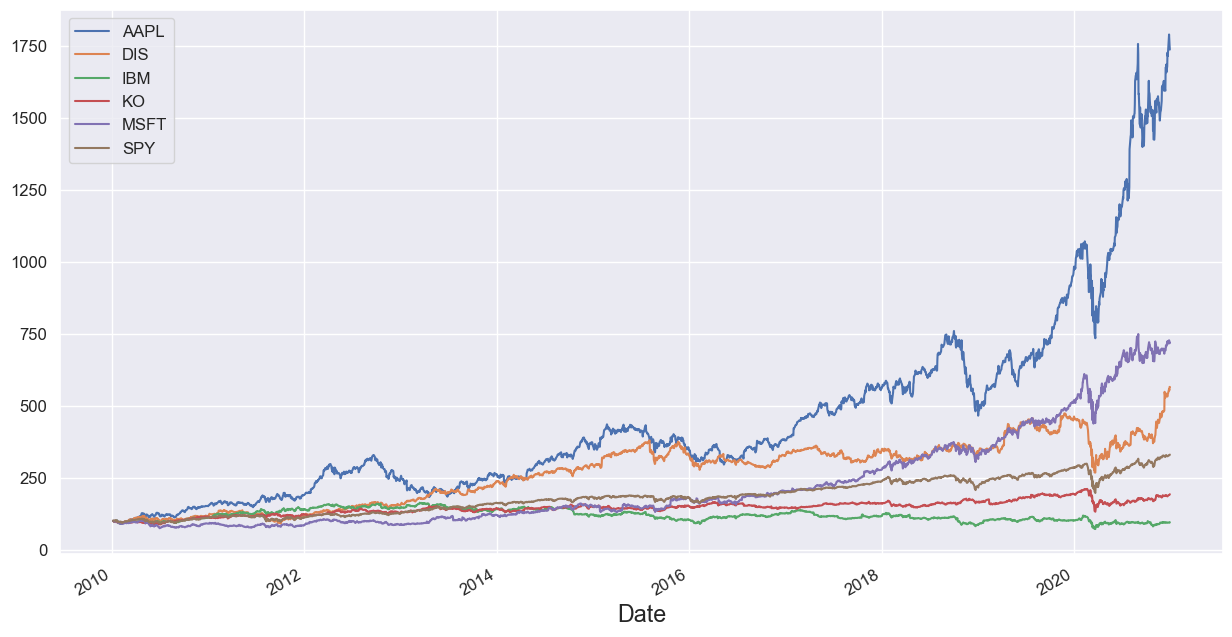

In [25]:
normclose.plot(figsize=(15,8), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [26]:
ret = close.pct_change().dropna()
ret.head()

,AAPL,DIS,IBM,KO,MSFT,SPY
Date,,,,,,
2010-01-05,0.001729,-0.002495,-0.012080,-0.012097,0.000323,0.002647
2010-01-06,-0.015906,-0.005314,-0.006496,-0.000355,-0.006137,0.000704
2010-01-07,-0.001849,0.000314,-0.003462,-0.002485,-0.010400,0.004221
2010-01-08,0.006648,0.001571,0.010035,-0.018509,0.006897,0.003328
2010-01-11,-0.008821,-0.016311,-0.010470,0.020308,-0.012720,0.001397


In [27]:
ret.describe().T # Transpose

,count,mean,std,min,25%,50%,75%,max
AAPL,2768.0,0.001191,0.017843,-0.128647,-0.007123,0.000903,0.010379,0.119808
DIS,2768.0,0.000749,0.015717,-0.129846,-0.006210,0.000629,0.007901,0.144123
IBM,2768.0,0.000082,0.014132,-0.128507,-0.006321,0.000287,0.006743,0.113010
KO,2768.0,0.000298,0.011088,-0.096725,-0.004698,0.000438,0.005706,0.064796
MSFT,2768.0,0.000841,0.016012,-0.147390,-0.006939,0.000654,0.008636,0.142169
SPY,2768.0,0.000491,0.010909,-0.109424,-0.003532,0.000637,0.005421,0.090603


In [28]:
summary = ret.describe().T.loc[:,["mean","std"]]
summary

,mean,std
AAPL,0.001191,0.017843
DIS,0.000749,0.015717
IBM,0.000082,0.014132
KO,0.000298,0.011088
MSFT,0.000841,0.016012
SPY,0.000491,0.010909


In [29]:
summary["mean"] = summary["mean"]*252
summary["std"] = summary["std"]*np.sqrt(252)
summary

,mean,std
AAPL,0.300134,0.283242
DIS,0.188696,0.249504
IBM,0.020648,0.224345
KO,0.075091,0.176009
MSFT,0.211915,0.254185
SPY,0.123754,0.173170


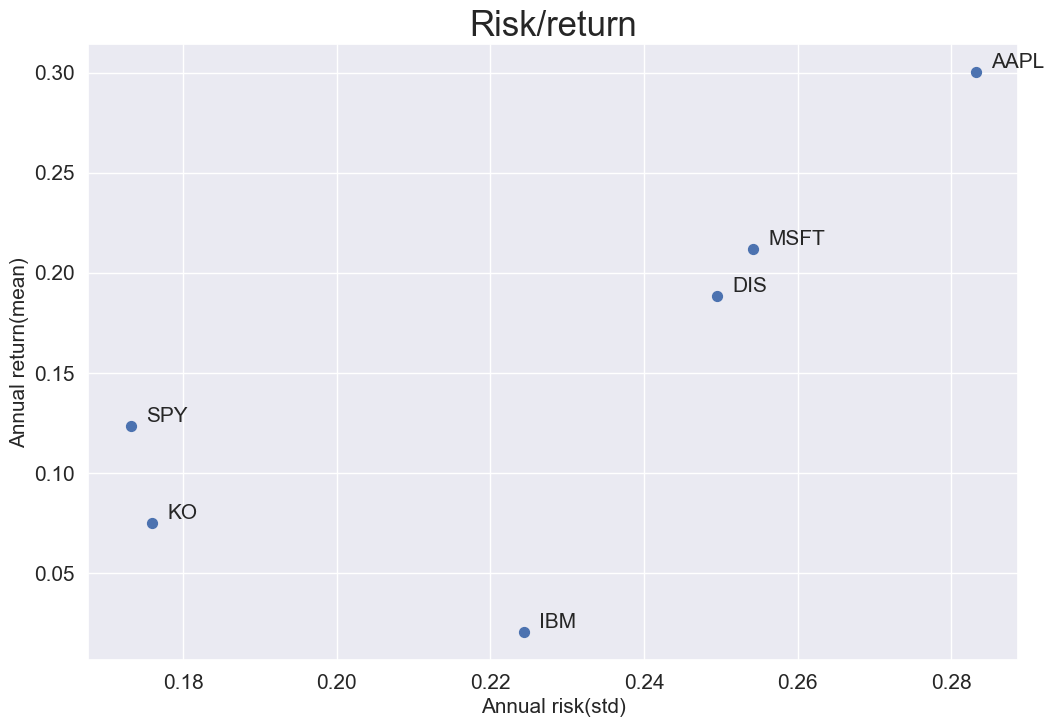

In [30]:
summary.plot.scatter(x="std", y="mean", figsize=(12,8), s=50, fontsize=15)
for i in summary.index:
    plt.annotate(i, (summary.loc[i,"std"]+0.002, summary.loc[i,"mean"]+0.002), fontsize=15)
plt.xlabel("Annual risk(std)", fontsize=15)
plt.ylabel("Annual return(mean)", fontsize=15)
plt.title("Risk/return", fontsize=25)
plt.show()

In [31]:
fruits = ["apple","banana","cherry","orange","kiwi","melon","mango"]
for i in fruits:
    print(i)

apple
banana
cherry
orange
kiwi
melon
mango


In [32]:
fruits[0]

'apple'

## Correlation and Covariance

In [33]:
ret

,AAPL,DIS,IBM,KO,MSFT,SPY
Date,,,,,,
2010-01-05,0.001729,-0.002495,-0.012080,-0.012097,0.000323,0.002647
2010-01-06,-0.015906,-0.005314,-0.006496,-0.000355,-0.006137,0.000704
2010-01-07,-0.001849,0.000314,-0.003462,-0.002485,-0.010400,0.004221
2010-01-08,0.006648,0.001571,0.010035,-0.018509,0.006897,0.003328
2010-01-11,-0.008821,-0.016311,-0.010470,0.020308,-0.012720,0.001397
...,...,...,...,...,...,...
2020-12-24,0.007712,0.001037,0.006376,0.006782,0.007827,0.003890
2020-12-28,0.035766,0.029529,0.001043,0.013473,0.009921,0.008591
2020-12-29,-0.013315,-0.008722,-0.008172,-0.000554,-0.003601,-0.001908


In [34]:
ret.cov()

,AAPL,DIS,IBM,KO,MSFT,SPY
AAPL,0.000318,0.000115,0.000110,0.000067,0.000158,0.000128
DIS,0.000115,0.000247,0.000111,0.000085,0.000121,0.000121
IBM,0.000110,0.000111,0.000200,0.000079,0.000121,0.000108
KO,0.000067,0.000085,0.000079,0.000123,0.000076,0.000077
MSFT,0.000158,0.000121,0.000121,0.000076,0.000256,0.000130
SPY,0.000128,0.000121,0.000108,0.000077,0.000130,0.000119


In [35]:
ret.corr()

,AAPL,DIS,IBM,KO,MSFT,SPY
AAPL,1.000000,0.408513,0.436100,0.339213,0.554051,0.659557
DIS,0.408513,1.000000,0.497775,0.486514,0.480457,0.706726
IBM,0.436100,0.497775,1.000000,0.502436,0.533130,0.703342
KO,0.339213,0.486514,0.502436,1.000000,0.429749,0.639324
MSFT,0.554051,0.480457,0.533130,0.429749,1.000000,0.744601
SPY,0.659557,0.706726,0.703342,0.639324,0.744601,1.000000


In [36]:
import seaborn as sns
%matplotlib inline

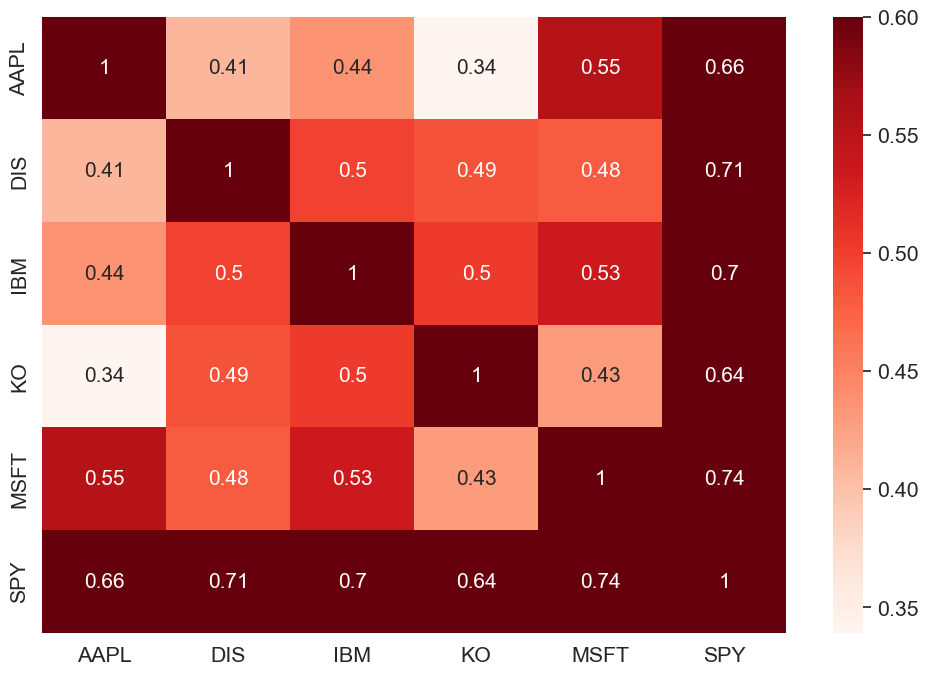

In [37]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(ret.corr(), annot=True, cmap="Reds", annot_kws={"size":15}, vmax=0.6)
plt.show()